In [32]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.signal import resample


from neurodsp.plts import plot_time_series
from neurodsp.sim import sim_combined, sim_oscillation

from bycycle import Bycycle

from bycycle.cyclepoints import find_extrema
from bycycle.plts import plot_cyclepoints_array

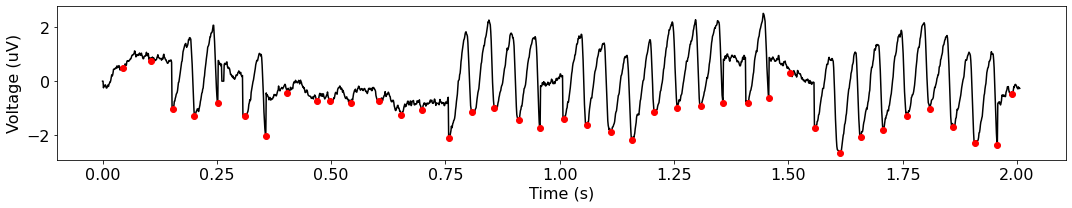

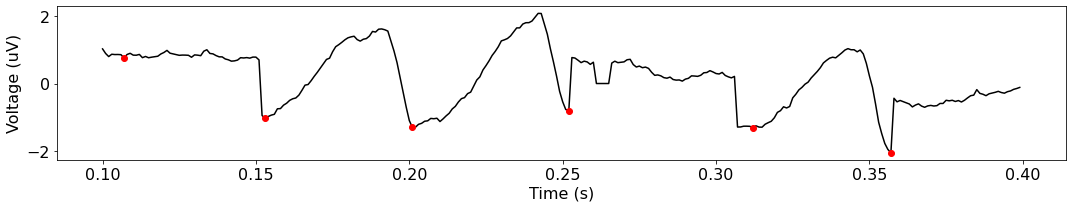

In [33]:
np.random.seed(1)

n_seconds = 2
fs = 1000
f_range = (10, 30)

times = np.arange(0, n_seconds, 1/fs)

components = {
    'sim_bursty_oscillation': {'freq': 20, 'cycle': 'asine', 'rdsym': .8, 'phase': 'min'},
    'sim_powerlaw': {'exponent': -2}
}

sig = sim_combined(n_seconds, fs, components, (1, .25)) 
sig = np.insert(sig, 0, [0, 0])
sig = np.insert(sig, 261, [0, 0, 0, 0, 0])
#sig = np.delete(sig_comb, np.arange(1450, 1540))

peaks, troughs = find_extrema(sig, fs, f_range)

plot_cyclepoints_array(sig, fs, troughs=troughs)
plot_cyclepoints_array(sig, fs, troughs=troughs, xlim=(.1, .4))

### Improved Cyclepoints for Stationary Waves:
1. Minimize deviations from center frequency
2. Maximize correlation between cycles

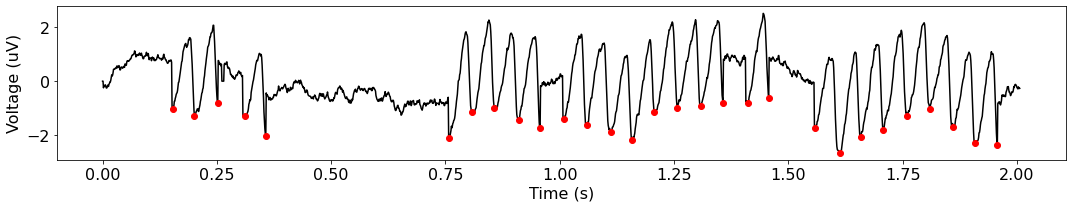

In [36]:
cyc_len = 50

# Resample to target cycle length
sig_resample = np.zeros((len(troughs)-1, cyc_len))

for tind, trough in enumerate(troughs[:-1]):
    
    _sig = sig[trough:troughs[tind+1]].copy()
    _sig -= _sig.mean()
    
    sig_resample[tind] = resample(_sig, cyc_len)
    
sig_avg = sig_resample.mean(axis=0)

# Find correlated cycles
mask = np.zeros(len(troughs), dtype=bool)

for ind, _sig in enumerate(sig_resample):
    if np.corrcoef(sig_avg, _sig)[0][1] > .75:
        mask[[ind, ind+1]] = True
        
inds = np.where(mask)[0]

plot_cyclepoints_array(sig, fs, troughs=troughs[inds])

We now have cycles that can be updated to a set number of sample per cycles, while also maximizing the correlation within themselves. The code above may also be used for an alternate burst detection method (this follows a similar procedure for finding motifs).